In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
%pylab inline
plt.rcParams['figure.figsize'] = (8.5, 5.5) ## set default plot size for notebook
plt.style.use('ggplot') ## set ggplot style

Populating the interactive namespace from numpy and matplotlib


# Support Vector Machine intuition with examples in Python

#### Starting with Logistic Regression

##### We use the sigmoid function:
$h(x) = {1 \over 1 + e^{-\beta^Tx}}$

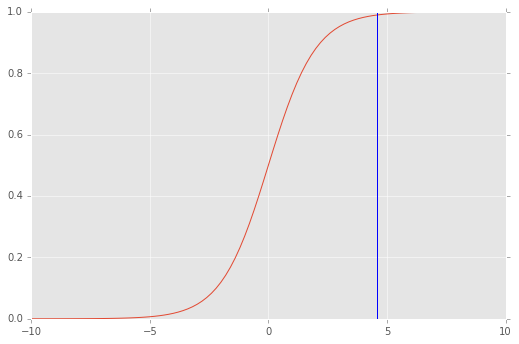

In [2]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a
    
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
#plt.axhline(0.95, color = 'red')
plt.axvline(4.6, color = 'blue')
plt.show()

When $z$ is equal to 4.6 it corresponds to probability of 0.99 once passed through the sigmoid function

$g(4.6) = 0.99$

where,
- $z$ = $\beta^Tx$
- $h(x) = 0.99$

### our 'prediction' of y is defined by
$h(x) = g(z)$

#### In the context of a binary classification problem our prediction is the output of pasing $z$ through the sigmoid function. 
remember $z = \beta^Tx$ 

#### If $y = 1$, we would like our predicted probability $h_\beta \approx 1$,  therefore, $\beta^Tx \gg 0$. Note that, $h_\beta \approx 1$ corresponds to $z > 4.6$.

#### If $y = 0$, we would like our predicted probability $h_\beta \approx 0$, therefore, $\beta^Tx \ll 0$. Note that, $h_\beta \approx 1$ corresponds to $z < -4.6$.

## Alternatively 

#### We have our cost function for ***each*** training example in Logisitic Regression
$-\Big(y \ log \ h_\beta(x) + (1-y) log(1-h_\beta(x))\Big)$

#### by taking the definition of our hypothesis $h_\beta(x)$ we an equivalent expression,

$ -\Big(y \ log \ {1 \over 1 + e^{-\beta^Tx}} - (1-y) log(1 - {1 \over 1 + e^{-\beta^Tx}})\Big)$

- In the case where $y=1$ only the first term $y \ log \ {1 \over 1 + e^{-\beta^Tx}}$ matters.
- The second term $(1-y) log(1 - {1 \over 1 + e^{-\beta^Tx}})$ becomes $0$, therefore we have $(1-1) log(1 - {1 \over 1 + e^{-\beta^Tx}})$

Note that 
- When $y=1$ the value given to the cost function decreases as $\beta^Tx$ becomes $\gg 0$
- When $y=0$ the value given to the cost function decreases as $\beta^Tx$ becomes $\ll 0$

### Visual interpretation of last two statements

In [3]:
def class_cost(x, example_class = 1):
    '''call loss function for either positive training example or negative training example'''
    a = []
    for item in x:
        if example_class == 1:
            a.append(-(np.log(1/(1+(np.exp(-item))))))
        elif example_class == 0:
            a.append(-(np.log(1 - 1/(1+(np.exp(-item))))))
    return a

def plot_class_cost(x, example_class = 1):
    '''plot output of cost function from a range of inputs given by x'''
    cost = class_cost(x, example_class)
    plt.plot(x, cost)
    plt.title("Cost given from single training example y=%d" %example_class, fontsize=20)
    plt.xlabel("$z$", fontsize=28)
    plt.show()

--------------------------------
values of cost derived from our hypothesis h_beta:
--------------------------------
[0.010001652055651873, 0.048587351573742027, 0.12692801104297252, 0.31326168751822281, 0.69314718055994529, 1.3132616875182228, 2.1269280110429714, 3.0485873515737452, 4.6100016520556588]
--------------------------------


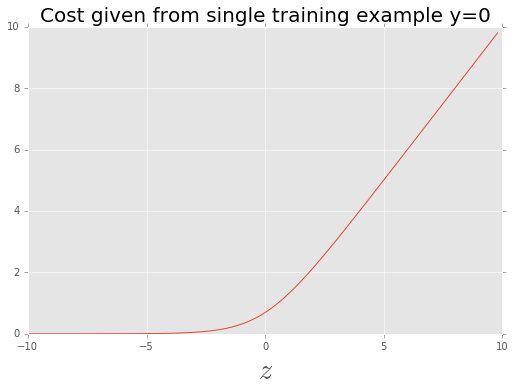

In [4]:
print("--------------------------------")
print("values of cost derived from our hypothesis h_beta:")
print("--------------------------------")
print(class_cost(x = [-4.6, -3, -2, -1, 0, 1, 2, 3, 4.6], example_class=0))
print("--------------------------------")
plot_class_cost(x, example_class=0)

In the figure above, 
- when $y=1$, as our value of $z$ decreases the cost increases
- when $y=0$, as our value of $z$ increases the cost increases

**Essentially**, we are being penalized more and more as our prediction becomes more "wrong".

# Cost functions

### Logistic
$- \min\limits_{\beta} {1\over m} \sum \limits_{i=1}^n \Big(y_i \ log \ h_\beta(x_i) + (1-y_i) log(1-h_\beta(x_i))\Big) + {\lambda \over 2m} \sum \limits_{i=1}^n \beta_j^2$

### SVM
$- \min\limits_{\beta} C \sum \limits_{i=1}^n \Big(y_i \ log \ h_\beta(x_i) + (1-y_i) log(1-h_\beta(x_i))\Big) + {1 \over 2} \sum \limits_{i=1}^n \beta_j^2$

#### Regularization term C
- C is a tradeoff between classifying points correctly and optimizing the margin of the decision boundary.
- A large C will classify points in training set correctly at the expense of the margin. In practice, this leaves us more prone to overfitting. 
- A small C will maximize the margin at the expense of misclassifications. In practice, this leaves us more prone to underfitting.

In other words
- A large $C$ means less regularization.
- A large $C$ makes the decision boundary more sensitive to noise, i.e. low bias, high variance.
- A large $C$ is comparable to small $1 \over \lambda$ (or a large $\lambda$).


Once the parameters have been learned logistic regression output corresponds to a probability of belonging to class 1, SVM predicts class directly as,

$h_\beta(x) = 1, \ if \ \beta^Tx \geq 0, \ otherwise \ 0$

## Cost function  

![](svm_cost.png)

In [5]:
def cost(parameters, x, y = 1, C = 1):
    theta_T_x = y*(parameters.transpose()*x) + (1-y)*(parameters.transpose()*x) ## cost function
    z = C*(np.sum(theta_T_x) + 1/2*(np.sum(parameters)**2))    
    
    if y == 1:
        if z >= 1:
            cost = 0
        else:
            cost = -1*z + 1 ## if z = 0, then cost = 1
    else:
        if z <= -1:
            cost = 0
        else:
            cost = 1*z + 1
    return(theta_T_x, z, cost)

In [6]:
cost(parameters = np.array([.5, .5, 2]), x = np.array([1, 4, 4]), y=1)

(array([ 0.5,  2. ,  8. ]), 15.0, 0)

We want extra padding on our decision boundary

## Example of a linearly separable case

i.e. the data can be divided perfectly by a linear equation, which produces a straight line.

**Not all code is my own**:
I was introduced to much of these concepts by Rahul Dave (Prof. at Harvard). He used Jake VanderPlas's (Prof. at Northwestern) code in a workshop I attended at BDF, you can find below.

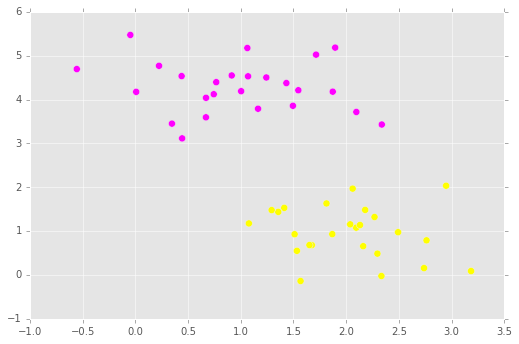

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60) ## produces 50 x 2 feature matrix, 50 x 1 response vector.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.show()

This data can be separated by a straight line but indeed many straight lines will do.

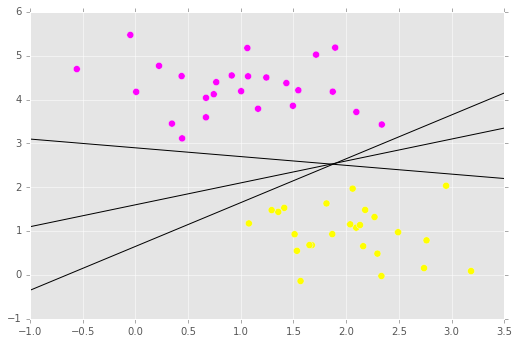

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

The equation of each line in the above figure will perfectly predict the class for each training example. 

(-1, 3.5)

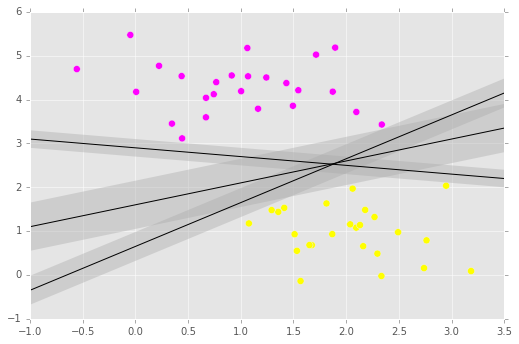

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Notice that the middle line has the largest margin between the closest training examples in either class.

In [10]:
## Let's fit an SVC to choose the best line for the data
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

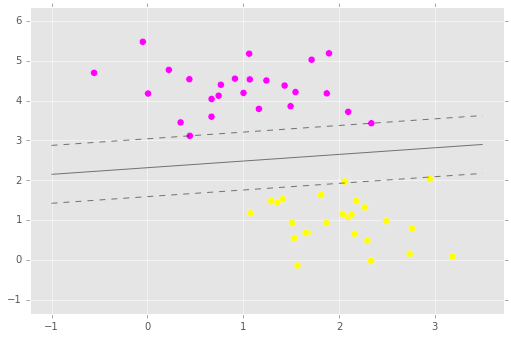

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

We have our solid line separating the data, it corresponds to the largest margin between classes.

Now, what happens if n becomes larger? How does it influence our line and the support vectors (those *training* examples touching our line).

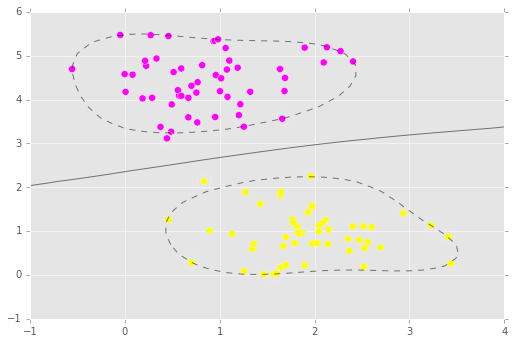

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from IPython.html.widgets import interact
#Stolen from Jake's notebooks, above: https://github.com/jakevdp/ESAC-stats-2014
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC # "Support Vector Classifier"

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

def plot_svm(N):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='rbf')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

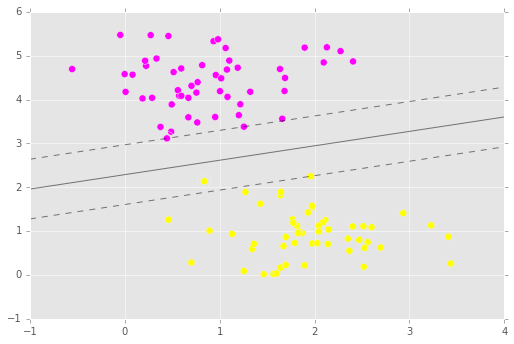

In [14]:
def plot_svm(N, show_support_vectors=False):
    ## Generate isotropic Gaussian blobs for clustering
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N] ## X for range(N), where N = interact update
    y = y[:N] ## y for range(N), where N = interact update
    clf = SVC(kernel='linear') ## linear kernel
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring') 
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    if show_support_vectors == True:
        print("Support Vectors position along first dimension")
        print(clf.support_vectors_[:, 0])
        print('\n')
        print("Support Vectors position along second dimension")
        print(clf.support_vectors_[:, 1])
    
    
interact(plot_svm, N=[10, 200], kernel='linear');

## What about reality? Non-linear cases.

In most cases you will deal with as a data scientist the data will not be linearly separable. So, how does an SVM do with non-linear decision functions? Well, it does quite well.

Before we go completely non-linear, it's worth noting that a linear SVM will give very similar results to a logistic regression.

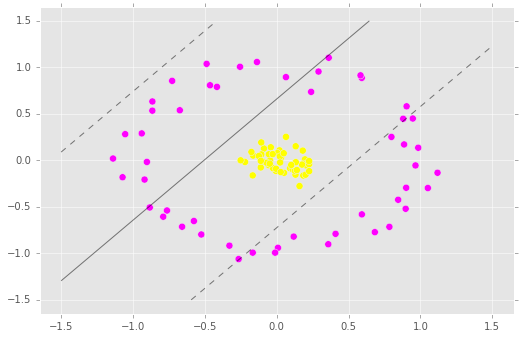

In [15]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

The above data is not separable by a linear equation. Note that much of the training examples denoted by the purple class are on the wrong side of the decision function.

We employ what is called a kernel trick that maps our features to landmarks in the data. The landmarks are other training examples in the data set. Our features then become the landmarks and in most kernels the values of the feature vectors represent the distance of the $i^{th}$ training example to the $j^{th}$ feature vector, where the $j^{th}$ feature vector is a landmark representation of another training example.

![](https://dl.dropboxusercontent.com/u/75194/BDF/img1331.png)

So let's see what using a Radial Gaussian kernel looks like...

$$e^{-\gamma d(x_1,x_2)^2} \tag{1}$$
---

More commonly written as: $$K(x, x') = exp \big(- \frac{||x-x'||^2} {2\sigma^2} \big) \tag{2}$$
---
The numerator represents the squared euclidean distance between $x$ and $x'$. In our first expression of the radial gaussian,

$$\gamma = \frac{1}{2\sigma^2} \tag{3}$$
---
$$d(x,x') = ||x-x'||$$


The $\sigma$ is a free parameter that sets  the  width  of  the  bell-shaped  curve. 
- A "large" $\gamma$ (small $\sigma$) corresponds to a non-smooth kernel function thus low bias, high variance.
- A "small" $\gamma$ (large $\sigma$) corresponds to a smooth kernel function thus high bias, low variance.


In practice this parameter can be tuned through cross-validation. In `sklearn` learn this corresponds to parameter `gamma` of an `SVC` estimator and the default value is `1/n_features`. 

- w.r.t equation 3, a large `gamma` corresponds to a small $\sigma$ while a small `gamma` corresponds to a large $\sigma$ and vice versa.

What does this mean for behavior of `gamma` w.r.t bias, variance tradeoff?

- Small `gamma` means high bias, low varaince.
- Large `gamma` means low bias, high variance.

## Here is a visual illustration!
-  `C` increases row-wise, `gamma` increases column-wise
 - Remember that increasing `C` means less regularization thus moving us from low to high variance.
![gamma interacting with C](http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)


In [16]:
## the gaussian kernel also called RBF (radian basis function) - a very common kernel in practice.
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [17]:
r

array([ 0.38945505,  0.97958696,  0.95211189,  0.93433685,  0.99423219,
        0.97089709,  0.98721347,  0.39256105,  0.99789124,  0.99073047,
        0.99462122,  0.44284418,  0.38691657,  0.36918992,  0.27315099,
        0.96010648,  0.94724784,  0.96202865,  0.44208498,  0.97617339,
        0.30394726,  0.37750772,  0.30287346,  0.40744486,  0.97876551,
        0.98455071,  0.31544519,  0.94095896,  0.32435173,  0.98812568,
        0.28368205,  0.98198895,  0.99386816,  0.96537313,  0.95715666,
        0.95659199,  0.99828994,  0.94884338,  0.36324023,  0.9923569 ,
        0.34097671,  0.9379313 ,  0.32107566,  0.4113145 ,  0.30620765,
        0.98429301,  0.99773398,  0.40916387,  0.49631029,  0.35443035,
        0.50352807,  0.4128553 ,  0.93753214,  0.41733305,  0.97893103,
        0.47483269,  0.34579064,  0.45301951,  0.50244373,  0.30217773,
        0.54903639,  0.44704645,  0.98261255,  0.32082585,  0.96746166,
        0.38058754,  0.37343899,  0.9877799 ,  0.96163182,  0.90

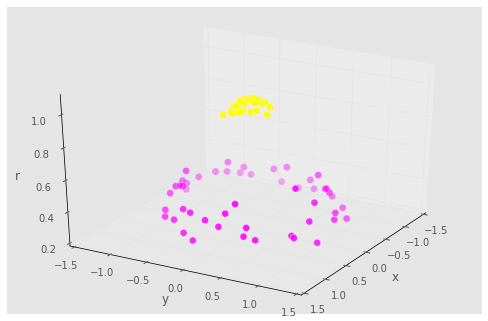

In [18]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

## set to elev = 19, azim = 40 for clear snapshot of now separable data

Above we have our input space, below we have feature space as a function of the RBF. The data is now easily separable in our feature space.

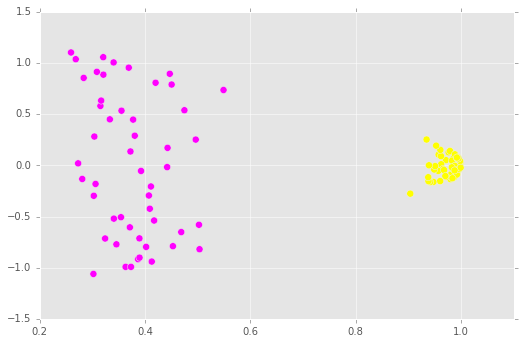

In [19]:
plt.scatter(r, X[:, 1], c=y, s=50, cmap='spring');

### The data is now separable! Let's fit a SVC to the data with the rbf hyperparameter in scikit-learn.

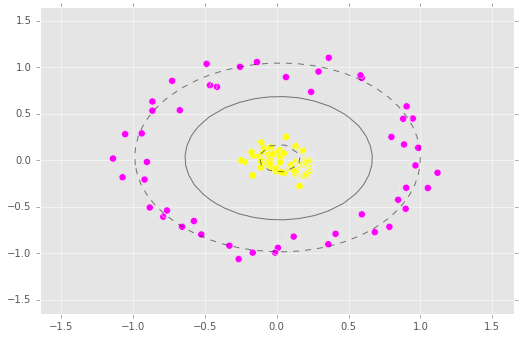

In [20]:
clf = SVC(kernel='rbf', C = .4) ## use radial basis function for a non-linear hypothesis function
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

If you're a bit confused check out the next image. On the left we have our input space to the right we have our features space defined by a *polynomial* kernel $K(x, y)$. Remeber in this notebook we are using RBF.

For more info see Wikipedia: https://en.wikipedia.org/wiki/Polynomial_kernel

![polynomial feature mapping from input space to feature space](Svm_8_polynomial.jpeg)

## Tuning hyperparameters

The scikit learn implementation of SVM allows for 3 parameters to be tuned

- `kernel`: can be 'rbf' (radial basis function) or 'linear', among others. This controls whether a linear or some other kernel is used to fit the data.
- `C`: the SVC penalty parameter
- `gamma`: the kernel coefficient for rbf

So what are the hyperparameters of our non-linear model that we just fit? Let's find out.

In [21]:
## specify the grid of hyperparameters we want to try
svc_param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 'auto'],
                             'C': [1, 10, 100, 1000]},
                            {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [22]:
from sklearn.model_selection import GridSearchCV 
clf = SVC() ## create instance of SVC
clf = GridSearchCV(estimator=clf, param_grid = svc_param_grid, cv=5) ## use clf, specify param_grid, use 5 fold CV.
clf.fit(X, y) ## fit model

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 'auto'], 'kernel': ['rbf']}, {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
## use method best_params_ to return the hyperparameters in our grid that minimized our cost function.
clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

One thing I really like about scikit-learn is that is returns the results of CV!

In [24]:
import pandas as pd
cross_validation_results = pd.DataFrame(clf.cv_results_) ## get results of CV by using method cv_results_

In [25]:
cross_validation_results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_gamma', 'param_kernel', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [26]:
cross_validation_results.head(n=3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000460,0.000211,0.6,0.705,1,0.01,rbf,"{'gamma': 0.01, 'C': 1, 'kernel': 'rbf'}",11,0.65,...,0.55,0.7125,0.6,0.725,0.55,0.725,0.000118,0.000048,0.044721,0.020310
1,0.000379,0.000187,0.6,0.700,1,0.001,rbf,"{'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}",11,0.65,...,0.55,0.7125,0.6,0.725,0.55,0.700,0.000006,0.000009,0.044721,0.017678
2,0.000367,0.000179,0.6,0.700,1,0.0001,rbf,"{'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}",11,0.65,...,0.55,0.7125,0.6,0.725,0.55,0.700,0.000008,0.000004,0.044721,0.017678


## Building scikit-learn pipelines to cv models and benchmark classifiers

# Lab

Now we will apply the concept review and code written above on our own data set of choice. Please take 15 minutes to import any data set that you find interesting and fit a SVM using scikit-learn. I encourage you to;

- optimize your hyperparameters using grid search and explore the CV results.
- benchmark your SVM model against models produced with other classifiers (i.e. logistic regression, random forest, boosting).